In [43]:
from sklearn.datasets import make_regression
data = make_regression(n_samples=100, n_features=1,noise=10, random_state=3)
data
x=data[0]
y= data[1]
x.resize(100,)
y.resize(100)
y.shape


(100,)

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
df = pd.DataFrame(data={'x':x, 'y':y})
df

,x,y
0,0.150617,8.013899
1,-0.888657,-25.792846
2,-1.860890,-79.826582
3,0.152946,-3.008826
4,0.899338,19.862157
...,...,...
95,-1.023876,-37.680812
96,-1.395764,-39.139523
97,1.487543,41.608773
98,-0.923792,-36.751917


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
x_train, x_test, y_train, y_test = train_test_split(x.reshape(100,1), y.reshape(100,1), test_size=0.2, random_state=42)

Accuracy =  0.9209022762616992


<module 'matplotlib.pyplot' from 'c:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

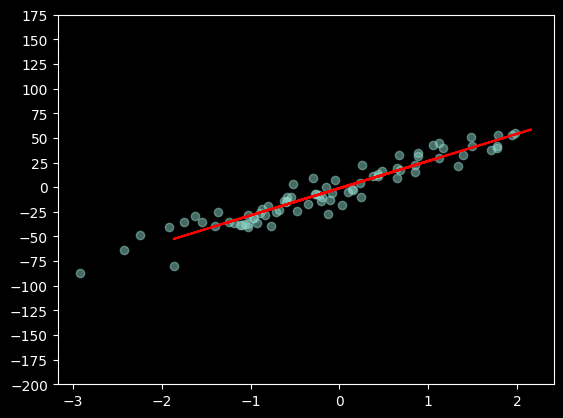

In [46]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print("Accuracy = ",r2_score(y_pred,y_test))
plt.scatter(x_train,y_train,alpha=0.5)
plt.plot(x_test,y_pred,'r-')
plt.yticks(np.arange(-200,200,25))
plt


Accuracy =  0.9212526578519006


<module 'matplotlib.pyplot' from 'c:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

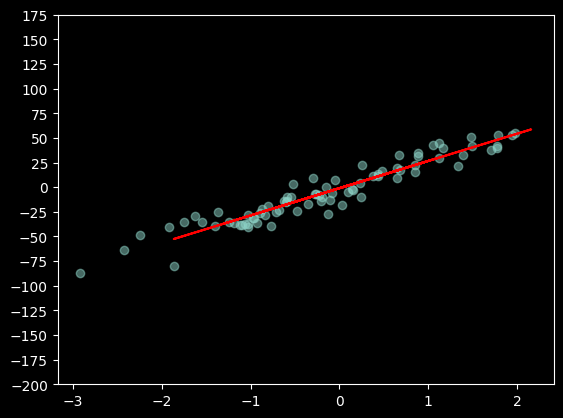

In [47]:
xy = x_train*y_train
x2 = x_train**2
byx = (x_train.size*np.sum(xy)-np.sum(x)*np.sum(y))/(x_train.size*np.sum(x2)-np.sum(x)**2)
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)
y_pred=byx*(x_test-x_mean)+y_mean
print("Accuracy = ",r2_score(y_pred,y_test))
plt.scatter(x_train,y_train,alpha=0.5)
plt.plot(x_test,y_pred,'r-')
plt.yticks(np.arange(-200,200,25))
plt

accuracy = 0.9236060534041229


<module 'matplotlib.pyplot' from 'c:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

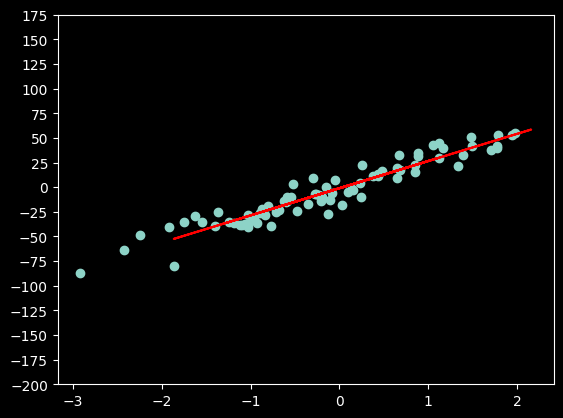

In [48]:
#import numpy as np
import math
#from sklearn.metrics import r2_score

def gradient_descent(theta1,theta0, m, y_train, x_train, alpha=0.1, tolerance=0.001):
    h = theta0 + theta1 * x_train
    error = h - y_train
    mse = (1/m) * np.sum(error**2)
    #rmse = math.sqrt(mse)
    gradient0 = (1/m) * np.sum(error)
    gradient1 = (1/m) * np.sum(error * x_train)
    new_theta_0 = theta0 - alpha * gradient0
    new_theta_1 = theta1 - alpha * gradient1
    if abs(new_theta_0 - theta0) < tolerance and abs(new_theta_1 - theta1) < tolerance:
        return theta0,theta1
    theta0, theta1 = new_theta_0, new_theta_1
    return gradient_descent(theta1,theta0,m,y_train,x_train)
theta1 =0
theta0=0
theta0, theta1 = gradient_descent(theta1,theta0, y_train.size, y_train, x_train)
y_pred = theta0 + theta1 * x_test
print("accuracy =", r2_score(y_test, y_pred))
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred,'r-')
plt.yticks(np.arange(-200,200,25))
plt

In [49]:

X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)
x=X
# Add a bias (intercept) term (column of ones) to the input features
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta = theta - alpha * gradients
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

# Initialize parameters
theta = np.zeros(X_train.shape[1])  # Initial theta (3 parameters: theta0, theta1, theta2)
alpha = 0.1  # Learning rate
num_iters = 1000  # Number of iterations

# Run gradient descent
theta, J_history = gradient_descent(X_train, y_train, theta, alpha, num_iters)

# Predict on test data
y_pred = X_test.dot(theta)
# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("Optimal theta values:", theta)
print("R^2 score on test set:", r2)

Optimal theta values: [6.59548036e-02 8.63101853e+01 7.36692791e+01]
R^2 score on test set: 0.9836279308340317


[6.59548036e-02 8.63101853e+01 7.36692791e+01]
Accuracy =  0.9831658207236531


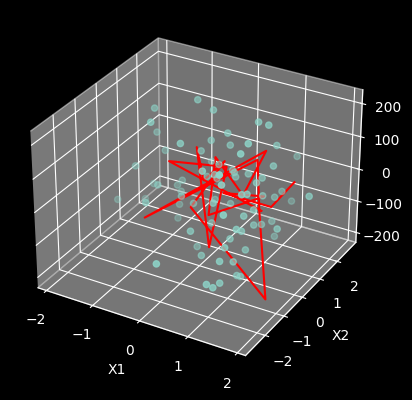

In [50]:
#x,y = make_regression(n_features=2,n_samples=100,noise=5,random_state=42)
x = np.c_[np.ones(x.shape[0]),x]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
def gradient_descent(x_train,y_train,alpha=0.1):
    theta = np.linalg.inv(x_train.T@x_train)@(x_train.T@y_train.reshape(y_train.size,1))
    return theta
theta = gradient_descent(x_train,y_train)
theta = theta.reshape(-1,)
print(theta)
#x_test = x_test.reshape(2,y_test.size)
y_pred = x_test.dot(theta)
print("Accuracy = ",r2_score(y_pred,y_test))
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train.reshape(-1,80)[0], x_train.reshape(-1,80)[1], y_train)
#plt.scatter(x_train,y_train)
ax.plot(x_test.reshape(-1,20)[0],x_test.reshape(-1,20)[1],y_pred,'r-')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.ion()
plt.show()

Best degree found: 5
Best cross-validated R^2 score: 0.9824281158025538
R^2 score on test set: 0.9845031826134748


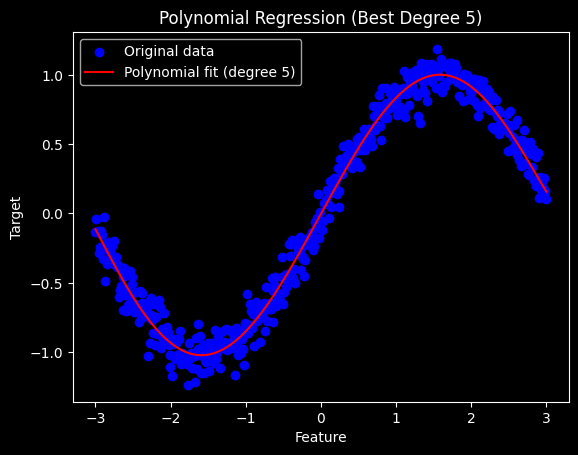

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X = np.linspace(-3, 3, 500).reshape(-1, 1)

y = np.sin(X) + np.random.normal(0, 0.1, X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

param_grid = {
    'poly__degree': [2, 3, 4, 5, 6, 7, 8, 10, 15, 20]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_degree = grid_search.best_params_['poly__degree']
print(f"Best degree found: {best_degree}")

best_score = grid_search.best_score_
print(f"Best cross-validated R^2 score: {best_score}")

y_pred = grid_search.best_estimator_.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R^2 score on test set: {r2}")

plt.scatter(X[:, 0], y, color='blue', label='Original data')

x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100).reshape(-1, 1)
y_range = grid_search.best_estimator_.predict(x_range)
plt.plot(x_range, y_range, color='red', label=f'Polynomial fit (degree {best_degree})')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title(f'Polynomial Regression (Best Degree {best_degree})')
plt.legend()
plt.show()


[-9.29620799e-03  9.81394799e-01  2.40747498e-04 -1.49841222e-01
 -4.19508534e-04  5.10502773e-03  6.01353485e-05]
Accuracy =  0.9825027485100981


<module 'matplotlib.pyplot' from 'c:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

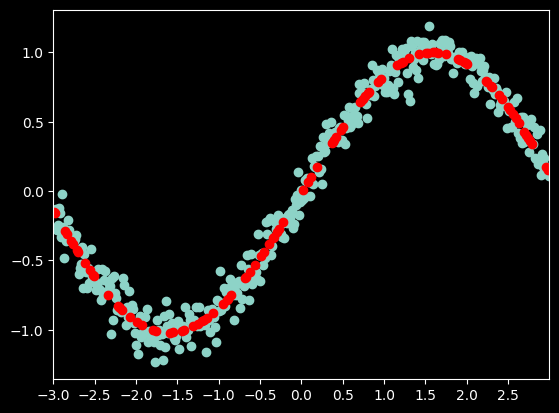

In [52]:
x = X
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)
poly = PolynomialFeatures(degree=6)
x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)
def normalEquation(x_train,y_train):
    theta = np.linalg.inv(x_train.T@x_train)@(x_train.T@y_train)
    return theta
theta = normalEquation(x_train,y_train)
theta = theta.reshape(-1,)
print(theta)
y_pred = x_test.dot(theta)
print("Accuracy = ",r2_score(y_pred,y_test))
X = x_test.T[1]
X1 = x_train.T[1]
plt.scatter(X1,y_train)
plt.plot(X,y_pred, 'ro')
plt.xlim(-3,3)
plt.xticks(np.arange(-3,3,0.5))
plt